## MMSB: Beer Survey

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import mmsb
import utils

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [2]:
data = pd.read_csv('../data/all_our_ideas/2565/2565_dat.csv', header=None)
text = pd.read_csv('../data/all_our_ideas/2565/2565_text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,2,5,0,749d8459047a7c024738d643524b889a
1,11,20,0,0cdd2260af00904baedc94baa0050fd6
2,2,19,1,f933c71f15dfb64842fd9832e3734ad4
3,4,11,1,f933c71f15dfb64842fd9832e3734ad4
4,9,20,0,0cdd2260af00904baedc94baa0050fd6


In [3]:
X = data[[0,1,2]].values
X.shape

(1468, 3)

In [4]:
V = max(X[:,1]) + 1
V

27

0:00:03.464015


(-856.68813632557419, -856.68813632557419)

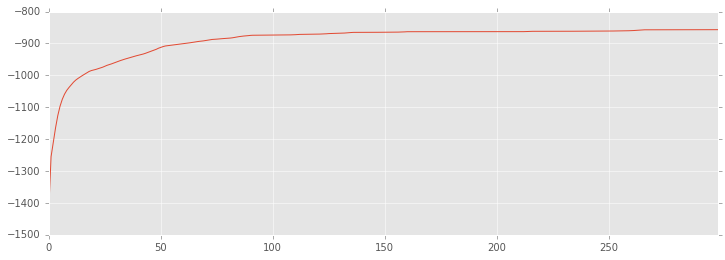

In [5]:
K = 4
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### B (interaction probabilities)

In [6]:
pd.DataFrame(B).round(3)

,0,1,2,3
0,0.500,0.024,0.066,0.045
1,0.976,0.500,0.134,0.155
2,0.934,0.866,0.500,0.341
3,0.955,0.845,0.659,0.500


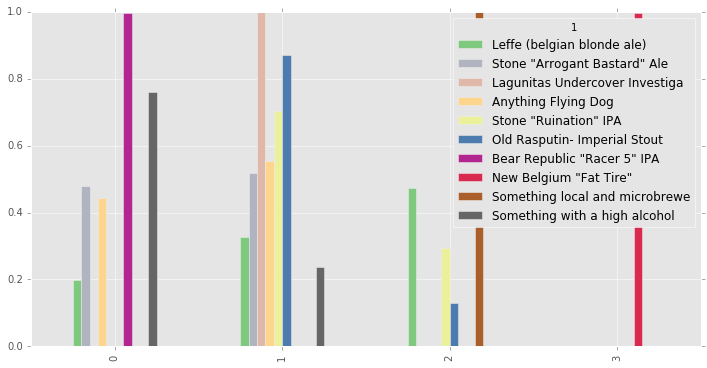

In [13]:
gamma_df = pd.DataFrame(gamma.T, index=text.apply(lambda x: x[:30]))
gamma_df.iloc[:10].T.plot(kind='bar', cmap='Accent', figsize=[12,6])

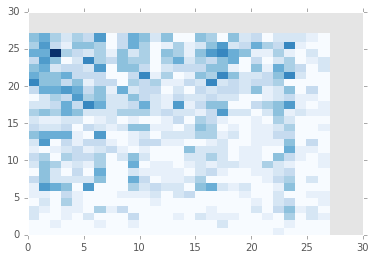

In [11]:
I = pd.DataFrame(utils.get_interactions(X, V))
ptypes = pd.DataFrame(gamma).idxmax()
plt.pcolor(I.ix[ptypes.sort_values().index], cmap='Blues')

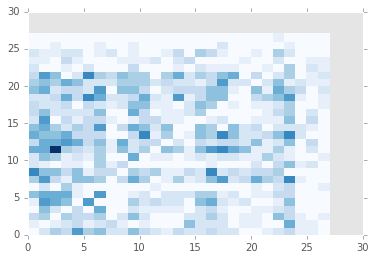

In [12]:
plt.pcolor(I, cmap='Blues')